# Решающие деревья

#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

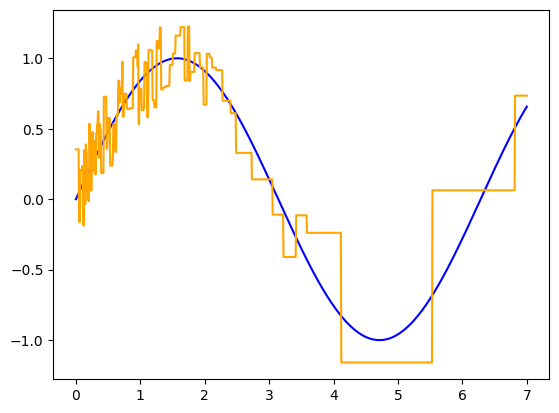

In [28]:
#code here
from sklearn.tree import DecisionTreeRegressor as DTR

x = np.random.exponential(size=sample_size)
y = f(x) + np.random.uniform(low=-1, high=1, size=sample_size) / 3 #Шум, сопоставимый с максимальным значением функции слишком большой

dsTree = DTR()
dsTree.fit(x[:, np.newaxis], y[:, np.newaxis])
dslinspace = linspace
plt.plot(linspace, f(linspace), color='blue')
plt.plot(linspace, dsTree.predict(linspace[:, np.newaxis]), color='orange')

__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

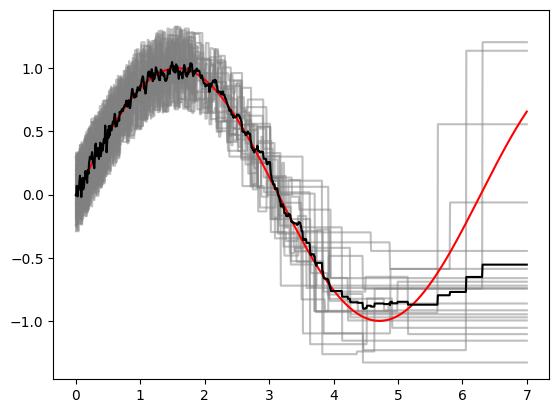

In [31]:
def depth(a):
    #code here
    aver_pred = np.zeros(linspace.shape)
    for _ in range(samples_num):
      dsTree = DTR(max_depth=a)
      x = np.random.exponential(size=sample_size)
      y = f(x) + np.random.uniform(low=-1, high=1, size=sample_size) / 3

      dsTree.fit(x[:, np.newaxis], y[:, np.newaxis])
      pred = dsTree.predict(linspace[:, np.newaxis])
      plt.plot(linspace, pred, color='gray', alpha=0.5)
      aver_pred += pred

    plt.plot(linspace, f(linspace), color='red')
    plt.plot(linspace, aver_pred / samples_num, color='black')
    plt.show()

    pass

depth(None)

__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

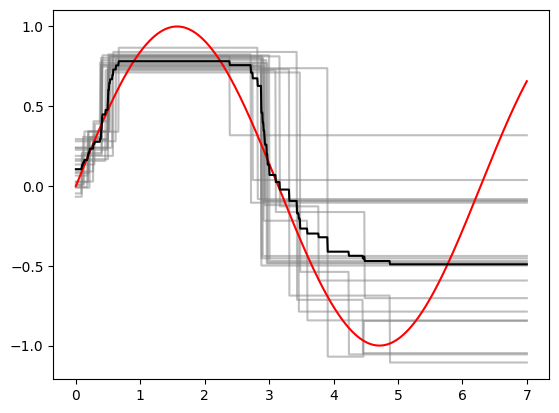

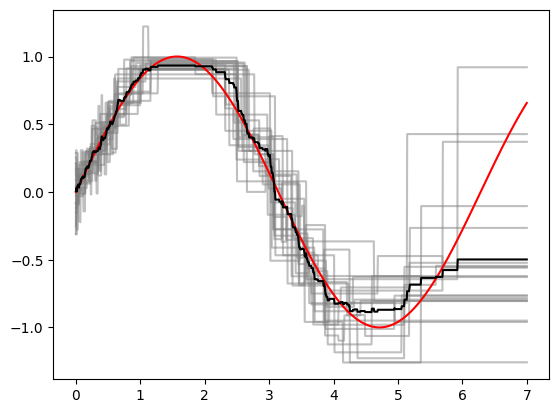

In [32]:
depth(2)
depth(4)

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

**Ответ:** Смещение близко к нулю как в случае без ограничения на максимальную глубину, так и с ограничением на глубину в размере 4, из чего можно сделать вывод, что достаточно хорошая точность начинается уже при средней глубине дереве, где ещё достаточно низкая вероятность переобучиться.

### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [50]:
import pandas as pd
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [36]:
from importlib import reload
from matplotlib import pyplot as plt
import hw3code
reload(hw3code)

<module 'hw3code' from '/content/hw3code.py'>

In [47]:
plt.figure()
x, y, bx, by = hw3code.find_best_split(data.iloc[:, :-1], data.iloc[:, -1]) #code here

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 258) + inhomogeneous part.

<Figure size 640x480 with 0 Axes>

__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
#code here

### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг.

In [ ]:
#code here

#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

In [ ]:
#code here
